In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
import numpy as np

Read csv

In [3]:
df1 = pd.read_csv('/content/drive/My Drive/opera-dl/data/opera_dataset_1w_10min.csv',parse_dates=['timestamp']).set_index('timestamp')
df2 = pd.read_csv('/content/drive/My Drive/opera-dl/data/opera_dataset_3w_30min.csv',parse_dates=['timestamp']).set_index('timestamp')
df3 = pd.read_csv('/content/drive/My Drive/opera-dl/data/opera_dataset_3w_90min.csv',parse_dates=['timestamp']).set_index('timestamp')


Model, parameters and cross-validation definition

In [4]:
cv_n=30
dataframes = [df1, df2, df3]
scenarios = ["10min","10min+10min+10min","10min+20min+60min"]
regr=svm.SVR(kernel='poly')
regr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Iterate cross validation for the 3 scenarios

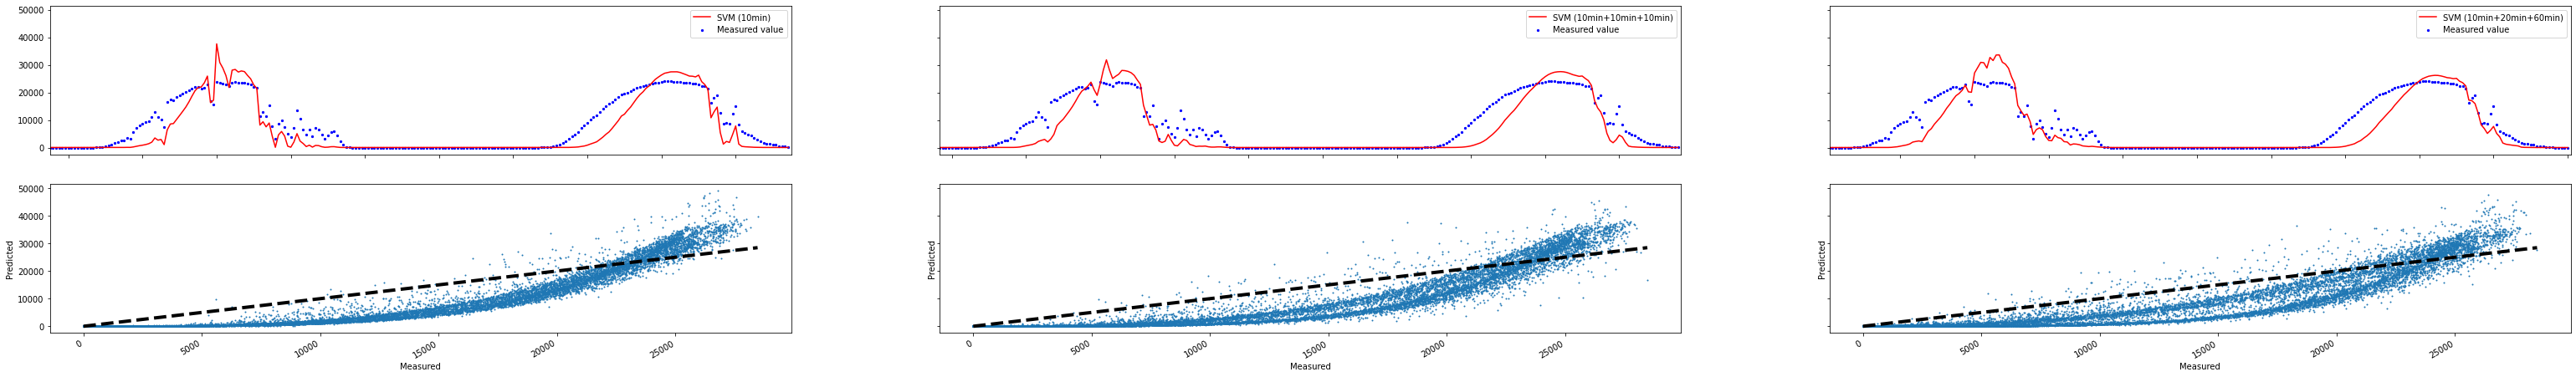

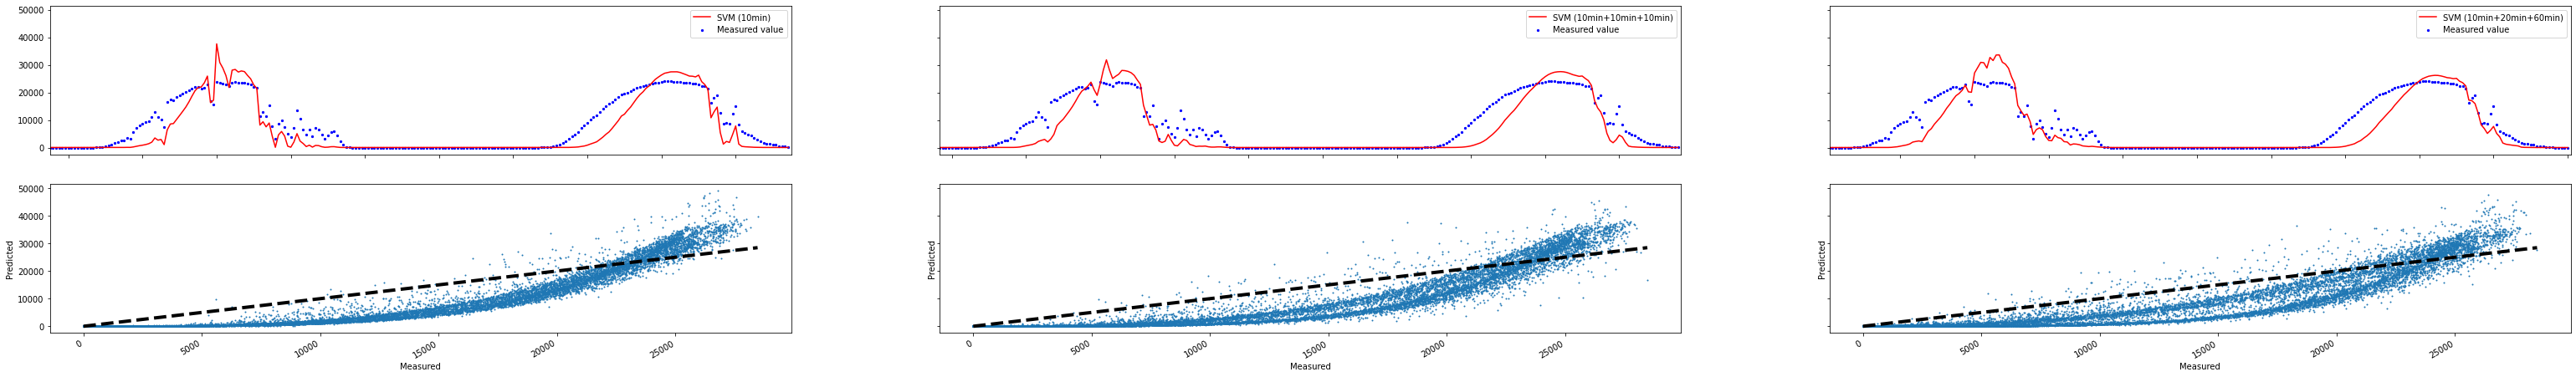

In [5]:
benchmark_accuracy=np.empty([3, 3])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(54, 8), sharey=True)
xplot_min = 12240
xplot_max = 12480

for ix,df in enumerate(dataframes): 
  X = df.drop('Pa1', axis=1)
  y = df['Pa1']

  scores_predict = cross_val_predict(regr, X, y, cv=cv_n)

  benchmark_accuracy[ix][0] = mean_squared_error(y,scores_predict,squared=False)
  benchmark_accuracy[ix][1] = mean_absolute_error(y,scores_predict)
  benchmark_accuracy[ix][2] = r2_score(y,scores_predict)


  axes[0,ix].scatter(X.index[xplot_min:xplot_max],y[xplot_min:xplot_max],color="blue",label="Measured value",s=5)
  axes[0,ix].plot(X.index[xplot_min:xplot_max],scores_predict[xplot_min:xplot_max], color="red",label="SVM ("+scenarios[ix]+")")
  axes[0,ix].legend()
  axes[0,ix].set_xlim(X.index[xplot_min],X.index[xplot_max])
  axes[1,ix].set_xlabel('Time')
  axes[1,ix].set_ylabel('Power')  

  axes[1,ix].scatter(y, scores_predict, s=1)
  axes[1,ix].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
  axes[1,ix].set_xlabel('Measured')
  axes[1,ix].set_ylabel('Predicted')  

fig.autofmt_xdate()
plt.show()


Error Metrics

In [ ]:
benchmark_acc_df_headers=["RMSE (W)","MAE (W)", "r2"]
benchmark_acc_df = pd.DataFrame(data=benchmark_accuracy,index=scenarios,columns=benchmark_acc_df_headers)
benchmark_acc_df.to_csv('/content/drive/My Drive/opera-dl/results/svm_accuracy_bm.csv')
benchmark_acc_df


Performance 

In [7]:
benchmark_performance=np.empty([3, 3])

for ix,df in enumerate(dataframes): 
  X = df.drop('Pa1', axis=1)
  y = df['Pa1']

  scores_eval = cross_validate(regr, X, y, cv=cv_n)

  benchmark_performance[ix][0] = scores_eval['fit_time'].mean()
  benchmark_performance[ix][1] = scores_eval['score_time'].mean()
  benchmark_performance[ix][2] = scores_eval['test_score'].mean()




Performance metrics

In [8]:
benchmark_perf_df_headers=["fit_time (s)","score_time (s)","test_score"]
benchmark_perf_df = pd.DataFrame(data=benchmark_performance,index=scenarios,columns=benchmark_perf_df_headers)
benchmark_perf_df.to_csv('/content/drive/My Drive/opera-dl/results/svm_performance_bm.csv')
benchmark_perf_df



,fit_time (s),score_time (s),test_score
10min,30.912459,0.322881,0.688216
10min+10min+10min,48.459787,0.846606,0.667626
10min+20min+60min,49.373021,0.857879,0.695964
